# Downloading Image data and Annotations from COCO website

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import requests  
file_url = "http://images.cocodataset.org/zips/train2017.zip"
    
r = requests.get(file_url, stream = True)  

with open("/content/drive/My Drive/train2017.zip", "wb") as file:  
    for block in r.iter_content(chunk_size = 1024): 
         if block:  
             file.write(block)

# Reading Image Data and Displaying it

In [ ]:
from google.colab import files

import pandas as pd
import numpy as np
from copy import deepcopy
from PIL import Image
import matplotlib.image as mpimg

import json
from pandas.io.json import json_normalize
from io import BytesIO
import os

from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab

import seaborn as sns
from wordcloud import WordCloud
import string

In [ ]:
annotationsInstancesFile = '/content/drive/My Drive/Colab_Notebooks/annotations/instances_train2017.json'
annotationsCaptionsFile = '/content/drive/My Drive/Colab_Notebooks/annotations/captions_train2017.json'

annotationsInstancesFile = '/content/drive/My Drive/Colab_Notebooks/annotations/instances_train2017.json'
annotationsCaptionsFile = '/content/drive/My Drive/Colab_Notebooks/annotations/captions_train2017.json'

loading annotations into memory...
Done (t=14.72s)
creating index...
index created!
loading annotations into memory...
Done (t=0.92s)
creating index...
index created!
A crowd of people standing on top of a field flying kites.
A big bunch of people in a field flying kites.
A group of people gathered together and flying kites. 
Several people are sitting in a field and there are several kites in the air.
A group of people hanging out in the grass flying kites.


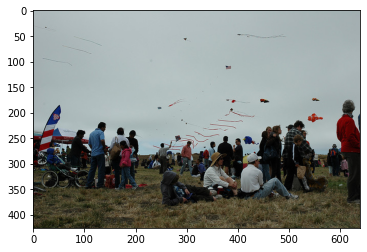

In [ ]:
# Function to display images if we pass the category

def display_image(*agrs):
    categories = agrs

    coco=COCO(annotationsInstancesFile)
    categoryIds = coco.getCatIds(catNms= categories)
    imageIds = coco.getImgIds(catIds = categoryIds )
    image = coco.loadImgs(imageIds[np.random.randint(0,len(imageIds))])[0]  

    coco_caps=COCO(annotationsCaptionsFile)
    annotationIds = coco_caps.getAnnIds(imgIds=image['id']);
    annotations = coco_caps.loadAnns(annotationIds)
    coco_caps.showAnns(annotations)

    #print(image)
    image_path = '/content/drive/My Drive/Colab_Notebooks/train2017/{}'.format(image['file_name'])
    #Im = Image.open(image['coco_url'])
    Img = io.imread(image['coco_url'])
    #Img.show()
    plt.imshow(Img);

display_image('person','flower')

## Reading Annotations Json, Creating Dataframe of Annotations and Displaying it

In [ ]:
with open('/content/drive/My Drive/Colab_Notebooks/annotations/captions_train2017.json') as data_file:    
  captionsjson = json.load(data_file)

captionsdataset = pd.json_normalize(captionsjson) # read json to create dataframe

caps = pd.json_normalize(captionsdataset.annotations[0])  # read annotations from captions json file and put it in dataframe
images = pd.json_normalize(captionsdataset.images[0]) # read categories form captions json file and put it in a DF

In [ ]:
caps.head(5) # captions dataframe

,image_id,id,caption
0,203564,37,A bicycle replica with a clock as the front wh...
1,322141,49,A room with blue walls and a white sink and door.
2,16977,89,A car that seems to be parked illegally behind...
3,106140,98,A large passenger airplane flying through the ...
4,106140,101,There is a GOL plane taking off in a partly cl...


In [ ]:
caps.sort_values(by = 'image_id')

,image_id,id,caption
433247,9,661611,Closeup of bins of food that include broccoli ...
433499,9,667602,A bunch of trays that have different food.
433454,9,666765,"Colorful dishes holding meat, vegetables, frui..."
433325,9,663627,there are containers filled with different kin...
433263,9,661977,A meal is presented in brightly colored plasti...
...,...,...,...
107305,581929,607381,The two brown horses are eating the grass.
106992,581929,597256,a horse is standing in a green field
107482,581929,612316,Two horses are grazing in a green field.
107118,581929,601057,two brown horses grazing in a fenced off field


In [ ]:
images.head(5) # images dataframe

,license,file_name,coco_url,height,width,date_captured,flickr_url,id
0,3,000000391895.jpg,http://images.cocodataset.org/train2017/000000...,360,640,2013-11-14 11:18:45,http://farm9.staticflickr.com/8186/8119368305_...,391895
1,4,000000522418.jpg,http://images.cocodataset.org/train2017/000000...,480,640,2013-11-14 11:38:44,http://farm1.staticflickr.com/1/127244861_ab0c...,522418
2,3,000000184613.jpg,http://images.cocodataset.org/train2017/000000...,336,500,2013-11-14 12:36:29,http://farm3.staticflickr.com/2169/2118578392_...,184613
3,3,000000318219.jpg,http://images.cocodataset.org/train2017/000000...,640,556,2013-11-14 13:02:53,http://farm5.staticflickr.com/4125/5094763076_...,318219
4,3,000000554625.jpg,http://images.cocodataset.org/train2017/000000...,640,426,2013-11-14 16:03:19,http://farm5.staticflickr.com/4086/5094162993_...,554625


In [ ]:
with open('/content/drive/My Drive/Colab_Notebooks/annotations/instances_train2017.json') as data_file:    
  instancesjson = json.load(data_file)


instancesdataset = pd.json_normalize(instancesjson) # read json to create dataframe

annotates = pd.json_normalize(instancesdataset.annotations[0])  # read annotations from instances json file and put it in dataframe
imgcategories = pd.json_normalize(instancesdataset.categories[0]) # read categories form instances json file and put it in a DF


In [ ]:
annotates.head(5) 

,segmentation,area,iscrowd,image_id,bbox,category_id,id,segmentation.counts,segmentation.size
0,"[[239.97, 260.24, 222.04, 270.49, 199.84, 253....",2765.14865,0,558840,"[199.84, 200.46, 77.71, 70.88]",58,156,NaN,NaN
1,"[[247.71, 354.7, 253.49, 346.99, 276.63, 337.3...",1545.42130,0,200365,"[234.22, 317.11, 149.39, 38.55]",58,509,NaN,NaN
2,"[[274.58, 405.68, 298.32, 405.68, 302.45, 402....",5607.66135,0,200365,"[239.48, 347.87, 160.0, 57.81]",58,603,NaN,NaN
3,"[[296.65, 388.33, 296.65, 388.33, 297.68, 388....",0.00000,0,200365,"[296.65, 388.33, 1.03, 0.0]",58,918,NaN,NaN
4,"[[251.87, 356.13, 260.13, 343.74, 300.39, 335....",800.41325,0,200365,"[251.87, 333.42, 125.94, 22.71]",58,1072,NaN,NaN


# Data Exploration

### Image Data Exploration

In [ ]:
imgcategories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   supercategory  80 non-null     object
 1   id             80 non-null     int64 
 2   name           80 non-null     object
dtypes: int64(1), object(2)
memory usage: 2.0+ KB


In [ ]:
imgcategories.describe()

,id
count,80.00000
mean,44.95000
std,26.42587
min,1.00000
25%,21.75000
50%,45.00000
75%,65.50000
max,90.00000


In [ ]:
annotates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 860001 entries, 0 to 860000
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   segmentation         849949 non-null  object 
 1   area                 860001 non-null  float64
 2   iscrowd              860001 non-null  int64  
 3   image_id             860001 non-null  int64  
 4   bbox                 860001 non-null  object 
 5   category_id          860001 non-null  int64  
 6   id                   860001 non-null  int64  
 7   segmentation.counts  10052 non-null   object 
 8   segmentation.size    10052 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 59.1+ MB


In [ ]:
annotates.describe()

,area,iscrowd,image_id,category_id,id
count,860001.000000,860001.000000,860001.000000,860001.000000,8.600010e+05
mean,12025.861494,0.011688,291547.263467,29.426627,1.054576e+10
std,29785.967488,0.107479,167954.428396,28.386080,9.696273e+10
min,0.000000,0.000000,9.000000,1.000000,8.600000e+01
25%,377.428100,0.000000,145264.000000,1.000000,4.472190e+05
50%,1697.086750,0.000000,293524.000000,21.000000,1.226409e+06
75%,8712.290200,0.000000,436349.000000,53.000000,1.719674e+06
max,787151.476650,1.000000,581929.000000,90.000000,9.090006e+11


In [ ]:
images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118287 entries, 0 to 118286
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   license        118287 non-null  int64 
 1   file_name      118287 non-null  object
 2   coco_url       118287 non-null  object
 3   height         118287 non-null  int64 
 4   width          118287 non-null  int64 
 5   date_captured  118287 non-null  object
 6   flickr_url     118287 non-null  object
 7   id             118287 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 7.2+ MB


In [ ]:
images.describe()

,license,height,width,id
count,118287.000000,118287.000000,118287.000000,118287.000000
mean,2.822085,484.098895,577.712065,290971.431535
std,1.506926,97.089573,91.884340,168038.941909
min,1.000000,51.000000,59.000000,9.000000
25%,1.000000,426.000000,500.000000,144947.500000
50%,3.000000,480.000000,640.000000,291630.000000
75%,4.000000,513.000000,640.000000,436134.000000
max,7.000000,640.000000,640.000000,581929.000000


In [ ]:
imgcategories.head(5)

,supercategory,id,name
0,person,1,person
1,vehicle,2,bicycle
2,vehicle,3,car
3,vehicle,4,motorcycle
4,vehicle,5,airplane


In [ ]:
imgcategories.supercategory.unique().tolist()   #unique supercatergories of images

['person',
 'vehicle',
 'outdoor',
 'animal',
 'accessory',
 'sports',
 'kitchen',
 'food',
 'furniture',
 'electronic',
 'appliance',
 'indoor']

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 <a list of 12 Text major ticklabel objects>)

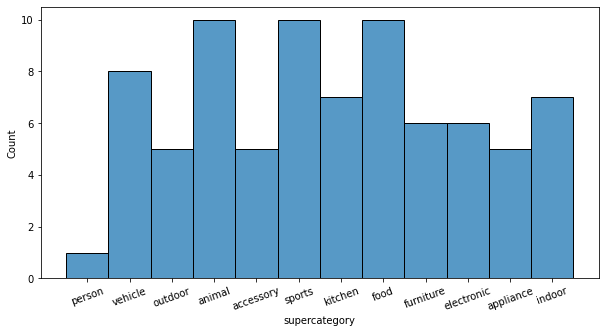

In [ ]:
plt.figure(figsize= (10,5))
sns.histplot(imgcategories.supercategory)
plt.xticks(rotation = 20)

In [ ]:
imgcategories.name.unique()

array(['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
       'train', 'truck', 'boat', 'traffic light', 'fire hydrant',
       'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog',
       'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe',
       'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee',
       'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat',
       'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
       'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl',
       'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot',
       'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch',
       'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop',
       'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven',
       'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase',
       'scissors', 'teddy bear', 'hair drier', 'toothbrush'], dtype=object)

In [ ]:
imgcategories.name.value_counts().sum()

80

### Text Data Exploration (Captions Exploration)

In [ ]:
caps.describe()

,image_id,id
count,591753.000000,591753.000000
mean,290968.190828,415365.280700
std,168038.146429,239744.746847
min,9.000000,25.000000
25%,144944.000000,207400.000000
50%,291622.000000,413110.000000
75%,436130.000000,623711.000000
max,581929.000000,829719.000000


In [ ]:
caps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 591753 entries, 0 to 591752
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   image_id  591753 non-null  int64 
 1   id        591753 non-null  int64 
 2   caption   591753 non-null  object
dtypes: int64(2), object(1)
memory usage: 13.5+ MB


In [ ]:
caps['word_count'] = 0
for row in range(len(caps)):
  caps['word_count'][row] = len(caps.caption[row].split())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


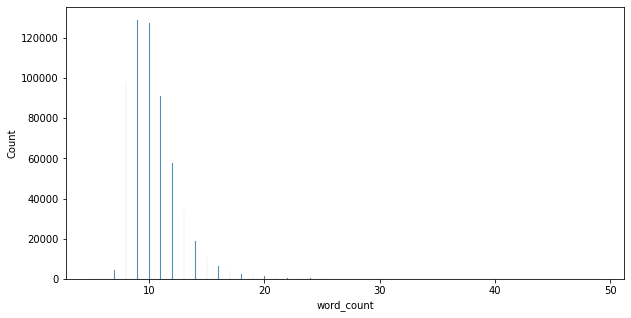

In [ ]:
plt.figure(figsize= (10,5))
sns.histplot(caps.word_count)

In [ ]:
caps.word_count.value_counts()

9     128950
10    127281
8      98140
11     91222
12     57944
13     33617
14     19116
15     10950
16      6583
7       4600
17      4098
18      2623
19      1833
20      1258
21       883
22       640
23       478
24       313
25       249
26       176
27       161
28        85
29        68
30        58
31        56
34        45
33        44
32        42
35        31
37        23
39        22
40        21
43        21
38        19
36        18
41        17
42        15
6         13
44        13
45         8
47         8
46         6
49         3
48         1
5          1
Name: word_count, dtype: int64

In [ ]:
caps.word_count.describe()

count    591753.000000
mean         10.457179
std           2.392612
min           5.000000
25%           9.000000
50%          10.000000
75%          11.000000
max          49.000000
Name: word_count, dtype: float64

In [ ]:
caps.caption.to_csv(r'/content/drive/My Drive/Colab_Notebooks/annotations/word_corpus.txt', header=None, index=None, sep='\t', mode='a')

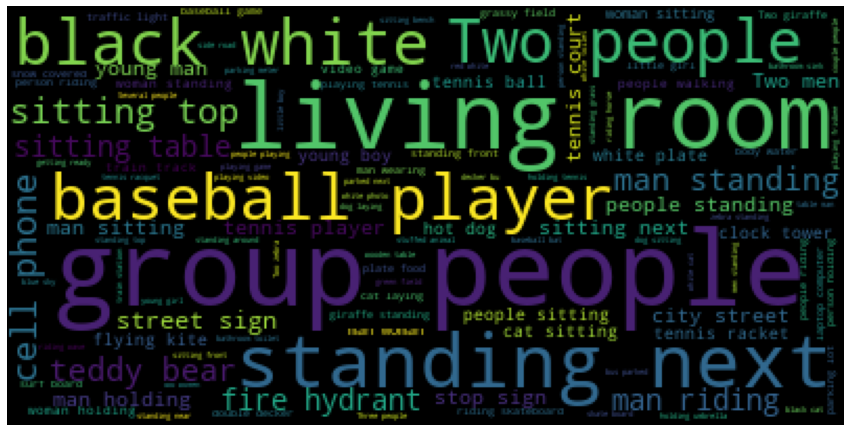

In [ ]:
#frequent word word cloud

captions_file = open(r'/content/drive/My Drive/Colab_Notebooks/annotations/word_corpus.txt','r')

corpus = captions_file.read()
wordcloud = WordCloud().generate(corpus)
plt.figure(figsize=(15,20))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# Preprocessing

### Image Data Preprocessing

In [ ]:
#Import libraries 
import tensorflow as tf
import keras
import keras.preprocessing
from keras.preprocessing import image 
from keras.preprocessing.image import img_to_array
from keras.applications.resnet50 import preprocess_input
from keras.applications.resnet50 import ResNet50, decode_predictions
import matplotlib.pyplot as plt
from keras.applications import resnet50
from keras.models import Model
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

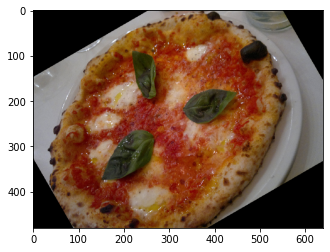

In [ ]:
# Image Rotation Function
def img_rotation(path, rotation):
  Rotation_Degree = rotation
  im = Image.open(path)
  plt.imshow(im.rotate(Rotation_Degree))

img_rotation('/content/drive/My Drive/Colab_Notebooks/train2017/000000000450.jpg',30)

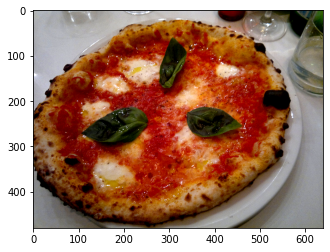

In [ ]:
# Image Contrast Function
def img_contrast(path, contrast):
  from PIL import ImageEnhance
  im = Image.open(path)
  enh = ImageEnhance.Contrast(im)
  plt.imshow(enh.enhance(contrast))

img_contrast('/content/drive/My Drive/Colab_Notebooks/train2017/000000000450.jpg', 1.5)

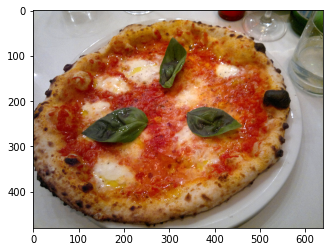

In [ ]:
# Image Brightness Function
def img_brightness(path, bright):
  from PIL import ImageEnhance
  im = Image.open(path)
  enh = ImageEnhance.Brightness(im)
  plt.imshow(enh.enhance(bright))

img_brightness('/content/drive/My Drive/Colab_Notebooks/train2017/000000000450.jpg', 1.25)

In [ ]:
# Below functions to be used in data generator function 

# Function to preprocess the images from the training dataset

def preprocess_images(image_file_name):
    # Change image to uniform size of 224 * 224
    img = image.load_img(image_file_name, target_size = (224, 224))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)
    return img

# Function to load Resnet model 

def load_model():
    #loading model weights
    model = ResNet50(weights='imagenet')
    #defining the model that is customized for our project which is removing the last layer in the model, so it can be attached to RNN
    customized_model = Model(model.input, model.layers[-2].output)
    return customized_model

# Function to encode images using Resnet

def encode_images(image_file_name):
    img = preprocess_images(image_file_name) # preprocess the image
    features = customized_model.predict(img) # Get the encoding vector for the image
    features = np.reshape(features, features.shape[1]) # reshape from (1, 2048) to (2048, )
    return features

# Function to get image paths

def get_image_paths(current_dir):
    files = os.listdir('/content/drive/My Drive/Colab_Notebooks/train2017');
    #print(files)
    paths = []; # To store relative paths of all images

    for file in files:
                image_paths = glob.glob(os.path.join('/content/drive/My Drive/Colab_Notebooks/train2017/', file))
                if image_paths:
                    paths.extend(image_paths);
    return paths

def show_images(image_file_name):
    print("Displaying ", image_file_name)
    # Change image to uniform size of 224 * 224
    img = image.load_img(image_file_name, target_size = (224, 224))
    imgplot = plt.imshow(img)
    plt.show()

Displaying  /content/drive/My Drive/Colab_Notebooks/train2017/000000061459.jpg


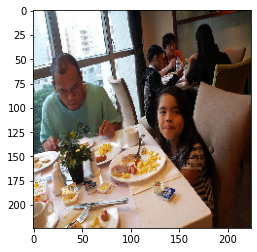

Displaying  /content/drive/My Drive/Colab_Notebooks/train2017/000000240862.jpg


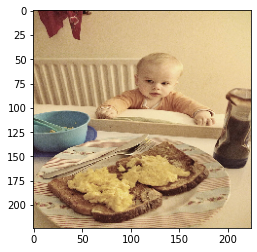

Displaying  /content/drive/My Drive/Colab_Notebooks/train2017/000000209718.jpg


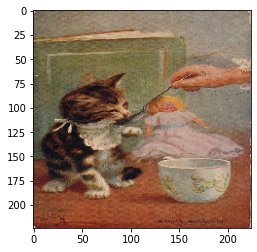

Displaying  /content/drive/My Drive/Colab_Notebooks/train2017/000000501756.jpg


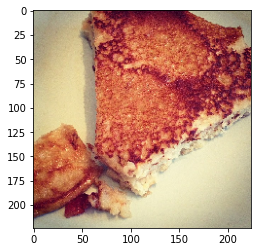

Displaying  /content/drive/My Drive/Colab_Notebooks/train2017/000000277998.jpg


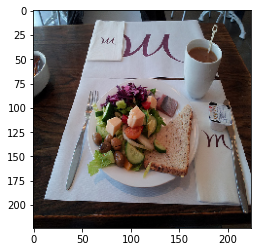

Displaying  /content/drive/My Drive/Colab_Notebooks/train2017/000000320957.jpg


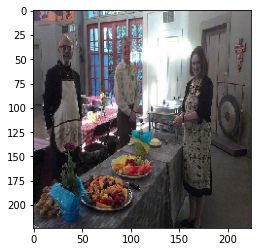

In [ ]:
# To get idea on the above functions let's run it on only 5 images

image_paths = get_image_paths(".")

encoded_train = {}

for i, image_path in enumerate(image_paths):
    show_images(image_path)
    encoded_train[i] = encode_images(image_path)
    if i==5:
      break
      
#print(encoded_train)

### Text Data Preprocessing

In [ ]:
# wite a text file containing captions with file name and number of caption like below.

# 000000000009.jpg#1	Closeup of bins of food that include broccoli and bread.
# 000000000009.jpg#2	A meal is presented in brightly colored plastic trays.
# 000000000009.jpg#3	there are containers filled with different kinds of foods
# 000000000009.jpg#4	Colorful dishes holding meat, vegetables, fruit, and bread.
# 000000000009.jpg#5	A bunch of trays that have different food.

images['image_id'] = images['id']
images.drop(columns = ['id'], inplace = True)
merged = pd.merge(images, caps, how ='inner', on = ["image_id"], sort = True)
merged.sort_values(by = 'image_id')
merged['c'] = merged.groupby(['image_id']).cumcount()+1
merged['filename'] = merged['file_name'].astype(str) + '#' + merged['c'].astype(str)

In [ ]:
merged[['filename','caption']].to_csv(r'/content/drive/My Drive/Colab_Notebooks/annotations/img_captions.txt', header=None, index=None, sep='\t', mode='a')

In [ ]:
# seperating file name(000000000009.jpg) from file name with image number (000000000009.jpg#1)

image_file_name = []

for i in merged.filename:
    image_file_name.append(i.split('#')[0])
    
merged['image_file_name'] = image_file_name

merged[['filename','image_file_name','caption']]

,filename,image_file_name,caption
0,000000000009.jpg#1,000000000009.jpg,Closeup of bins of food that include broccoli ...
1,000000000009.jpg#2,000000000009.jpg,A meal is presented in brightly colored plasti...
2,000000000009.jpg#3,000000000009.jpg,there are containers filled with different kin...
3,000000000009.jpg#4,000000000009.jpg,"Colorful dishes holding meat, vegetables, frui..."
4,000000000009.jpg#5,000000000009.jpg,A bunch of trays that have different food.
...,...,...,...
591748,000000581929.jpg#1,000000581929.jpg,a horse is standing in a green field
591749,000000581929.jpg#2,000000581929.jpg,two brown horses grazing in a fenced off field
591750,000000581929.jpg#3,000000581929.jpg,The two brown horses are eating the grass.
591751,000000581929.jpg#4,000000581929.jpg,Two horses are grazing in a green field.


In [ ]:
# creating stop words and add punctuations to stop words

import nltk
from nltk.tokenize import regexp_tokenize, word_tokenize, sent_tokenize
nltk.download('stopwords')
nltk.download('punkt')
stopwords = nltk.corpus.stopwords.words('english')

# Join stopwords and punctuation
punct = list(string.punctuation)
stops = stopwords + punct 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
# lowers the case, tokenizes the captions and removes the stopword

def tokenize_text(text):
  return [word for word in word_tokenize(text.lower()) if not word in stops]

In [ ]:
# creates a dataframe that lists sentence count, Tokens, Total Tokens, Unique tokens, Avg words per sentence
grouped_df = merged.groupby("image_file_name")
grouped_lists = grouped_df["caption"].agg(lambda column: "\n".join(column))
text_df = pd.DataFrame(grouped_lists.to_frame())
text_df = text_df.reset_index()
text_df['Sentence_count'] = text_df['caption'].apply(lambda x: len(x.strip().split('\n')))
text_df['Tokens'] = text_df['caption'].apply(lambda x: tokenize_text(x))
text_df['Total_tokens'] = text_df['Tokens'].apply(lambda x: len(x))
text_df['Unique_tokens'] = text_df['Tokens'].apply(lambda x: len(set(x)))
text_df['Avg_words_per_sentence'] = text_df['Total_tokens']/text_df['Sentence_count']
text_df

,image_file_name,caption,Sentence_count,Tokens,Total_tokens,Unique_tokens,Avg_words_per_sentence
0,000000000009.jpg,Closeup of bins of food that include broccoli ...,5,"[closeup, bins, food, include, broccoli, bread...",28,24,5.6
1,000000000025.jpg,A giraffe eating food from the top of the tree...,5,"[giraffe, eating, food, top, tree, giraffe, st...",25,16,5.0
2,000000000030.jpg,A flower vase is sitting on a porch stand.\nWh...,5,"[flower, vase, sitting, porch, stand, white, v...",30,17,6.0
3,000000000034.jpg,A zebra grazing on lush green grass in a field...,5,"[zebra, grazing, lush, green, grass, field, ze...",26,13,5.2
4,000000000036.jpg,Woman in swim suit holding parasol on sunny da...,5,"[woman, swim, suit, holding, parasol, sunny, d...",45,32,9.0
...,...,...,...,...,...,...,...
118282,000000581906.jpg,"A damaged, leather suit case sitting on a dirt...",5,"[damaged, leather, suit, case, sitting, dirty,...",31,23,6.2
118283,000000581909.jpg,A boat on a trailer with other boats near it b...,5,"[boat, trailer, boats, near, water, old, boat,...",26,16,5.2
118284,000000581913.jpg,Four donuts in a box with a variety of frostin...,5,"[four, donuts, box, variety, frostings, close,...",23,14,4.6
118285,000000581921.jpg,THERE IS A MAN THAT IS JUMPING HIGH ON A SNOW ...,5,"[man, jumping, high, snow, board, snowboarder,...",29,17,5.8


In [ ]:
#combines all the captions into single text file
def combine_text(corpus):
    combined_text = ''
    for text in corpus:
        combined_text+='\n'+ str(text.lower())
    return combined_text

In [ ]:
combined_captions = combine_text(text_df.caption)

In [ ]:
# returns total tokens and unique tokens from the entire corpus
total_tokenized_captions = tokenize_text(combined_captions)
total_tokens = len(total_tokenized_captions)
total_unique_tokens = len(set(total_tokenized_captions))
total_sentences = len(combined_captions.strip().split('\n'))

print(f'There are {total_tokens} total words in the corpus', '\n')
print(f'There are {total_unique_tokens} UNIQUE words in the corpus','\n')
print(f'There are {total_sentences} sentences in the corpus','\n')

There are 3423462 total words in the corpus 

There are 29488 UNIQUE words in the corpus 

There are 594145 sentences in the corpus 



#### Load Captions from file, Cleaning the captions, Removing Stopwords, Lemmating, so the resultant can be fed to a word embedding functions to get word embeddings

In [ ]:
captions_doc = open(r'/content/drive/My Drive/Colab_Notebooks/annotations/img_captions.txt','r')
captions_file = captions_doc.read()

In [ ]:
# Function to load captions file and derive only descriptions from it for text processing

def load_captions_file(doc):
  mapping = dict()

  for line in doc.split('\n'):
      tokens = line.split()

      if len(line) < 2:
          break
    
      image_id, image_caption = tokens[0] , tokens[1:]
      image_id = image_id.split('.')[0]
      image_caption = ' '.join(image_caption)
      if image_id not in mapping:
		      mapping[image_id] = list()

		  
      mapping[image_id].append(image_caption)
  return mapping

image_descriptions = load_captions_file(captions_file)

In [ ]:
image_descriptions['000000000009'] # one example on how derived descrption looks

['Closeup of bins of food that include broccoli and bread.',
 'A meal is presented in brightly colored plastic trays.',
 'there are containers filled with different kinds of foods',
 'Colorful dishes holding meat, vegetables, fruit, and bread.',
 'A bunch of trays that have different food.']

In [ ]:
# Function to clean captions that removes punctuation, makes every word of lower case and then removes any number. We did this because words like meal and Meal will be counted as different words otherwise. 
# Number are removed so they are not counted as words. So is with the punctuation. They should not be counted as words, thats why we are removing it.
# stop words are words that occur very commonly in the corups and it does not add any meaning to the sentence and as these are occuring very frequently their, probabilty should not affect other words probability of occurring while
# calculating them. So we have removed them.
# Lemmatization removes -ing, -ed forms of the verbs, nouns, it basically keeps the base form. So that word embddings dont have words like eating and eat. 


def clean_captions(image_descpt):
  for image_id, image_caption in image_descpt.items():
    for i in range(len(image_caption)):
      token = image_caption[i]
      token = token.split()
      token = [word.lower() for word in token]
      token = [word for word in token if len(word)>1]
      token = [word.translate(str.maketrans('', '', string.punctuation)) for word in token]
      token = [word for word in token if word.isalpha()]
      image_caption[i] =  ' '.join(token)
  return image_descpt 

cleanedCaptions = clean_captions(deepcopy(image_descriptions))

In [ ]:
cleanedCaptions['000000000009'] # one example on how cleaned descrption looks

['closeup of bins of food that include broccoli and bread',
 'meal is presented in brightly colored plastic trays',
 'there are containers filled with different kinds of foods',
 'colorful dishes holding meat vegetables fruit and bread',
 'bunch of trays that have different food']

In [ ]:
from nltk.corpus import stopwords 

stop_words = set(stopwords.words('english')) # loading stop words

In [ ]:
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [ ]:
# Function to remove stop words from the description, so that commonly used words that dont make much sense to the meaning of the sentence are removed

def remove_stop_words(image_descpt):
  for image_id, image_caption in image_descpt.items():
    for i in range(len(image_caption)):
      token = image_caption[i]
      token = token.split()
      token = [word for word in token if word not in stop_words]
      image_caption[i] =  ' '.join(token)
  return image_descpt 

cleanedCaptions_withoutStopWords = remove_stop_words(deepcopy(cleanedCaptions))

In [ ]:
cleanedCaptions_withoutStopWords['000000000009'] # one example on how cleaned descrption looks

['closeup bins food include broccoli bread',
 'meal presented brightly colored plastic trays',
 'containers filled different kinds foods',
 'colorful dishes holding meat vegetables fruit bread',
 'bunch trays different food']

In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
from nltk.stem import WordNetLemmatizer 
wordnet_lemmatizer = WordNetLemmatizer()

In [ ]:
# Function to lemmatize the words, lemma means base word, so only the base word is retained -ing form, -ed forms are converted to base words

def captions_lemmatization(image_descp):
  for image_id, image_caption in image_descp.items():
    for i in range(len(image_caption)):
      token = image_caption[i]
      token = token.split()
      token = [wordnet_lemmatizer.lemmatize(word, pos = 'v') for word in token]
      image_caption[i] =  ' '.join(token)
  return image_descp

captions_lemmatized = captions_lemmatization(deepcopy(cleanedCaptions_withoutStopWords))

In [ ]:
captions_lemmatized['000000000009'] # one example on how lemmatized descrption looks

['closeup bin food include broccoli bread',
 'meal present brightly color plastic trays',
 'containers fill different kinds foods',
 'colorful dish hold meat vegetables fruit bread',
 'bunch trays different food']